In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense,Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/ARAVINDH/Downloads/forestfire.csv") 

In [3]:
df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# consider Log-area = log10(area+1) #(after adding 1 to avoid zeros)

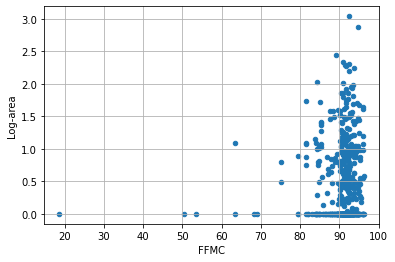

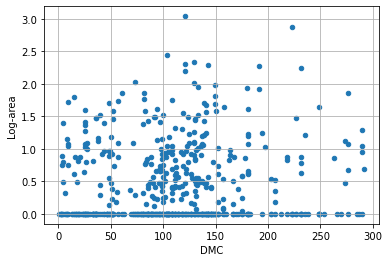

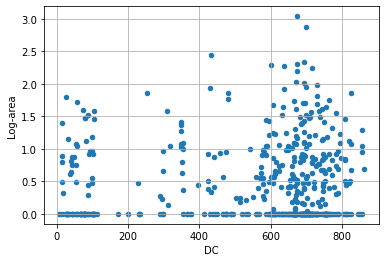

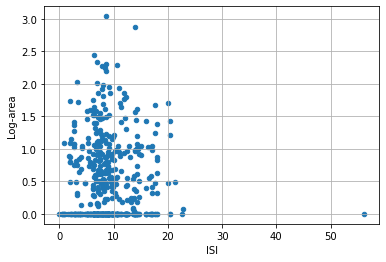

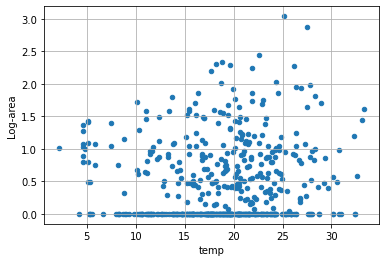

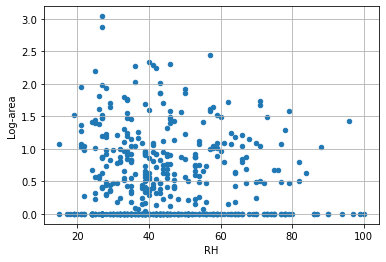

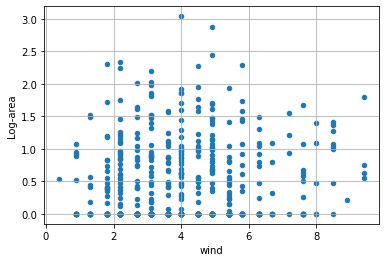

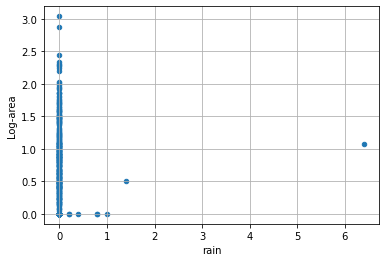

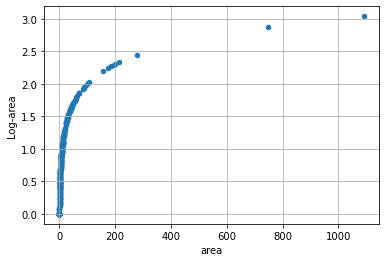

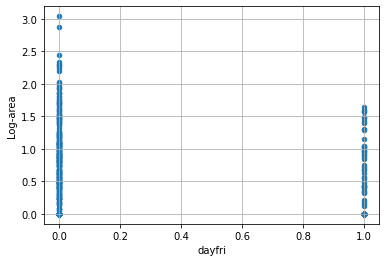

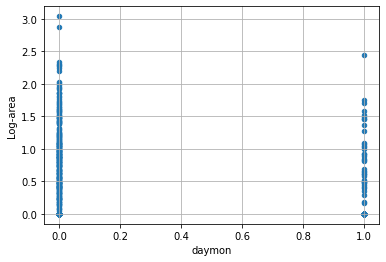

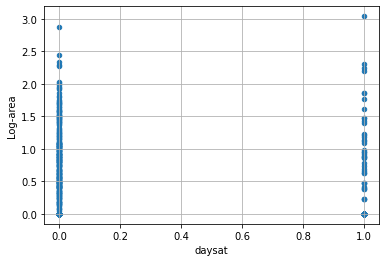

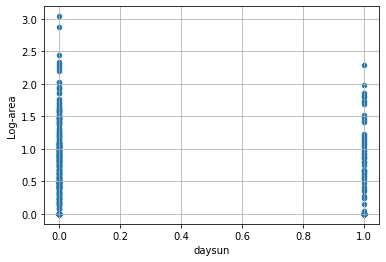

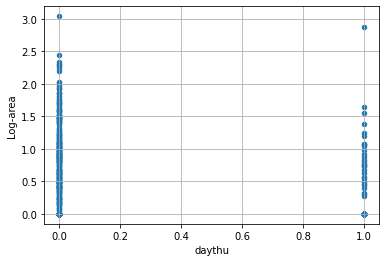

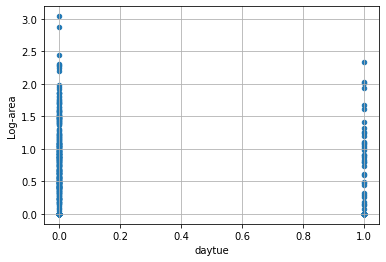

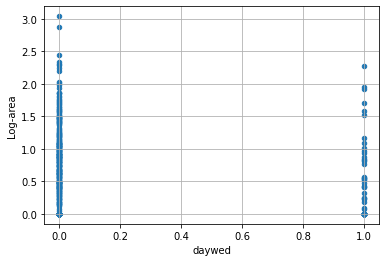

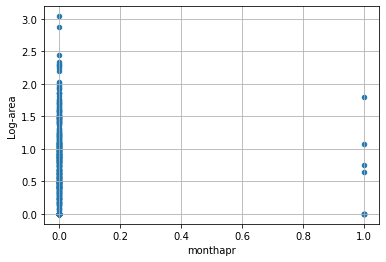

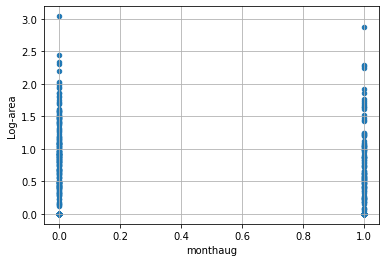

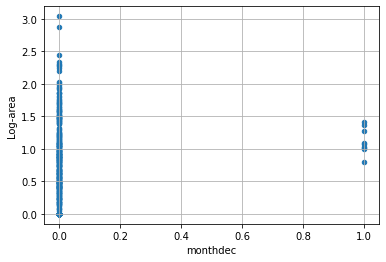

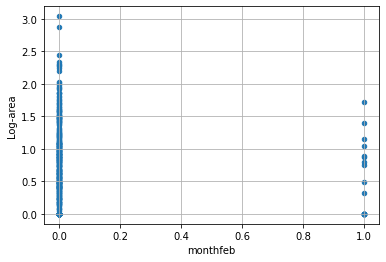

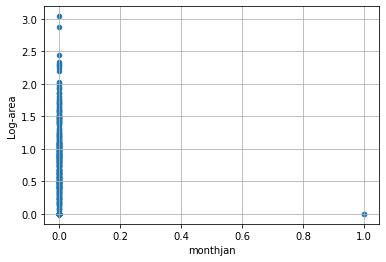

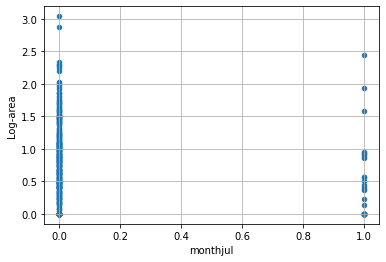

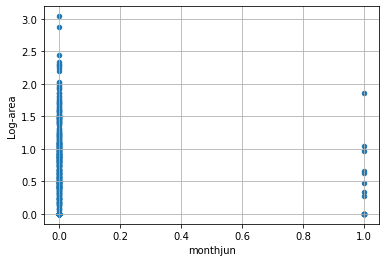

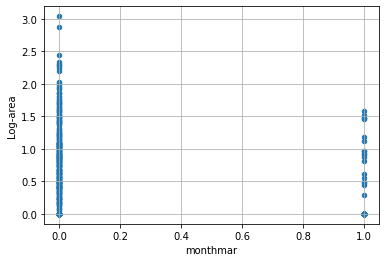

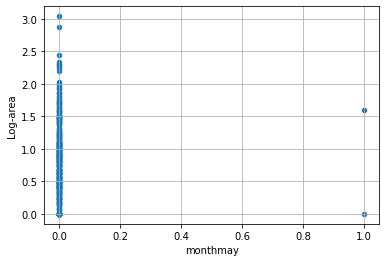

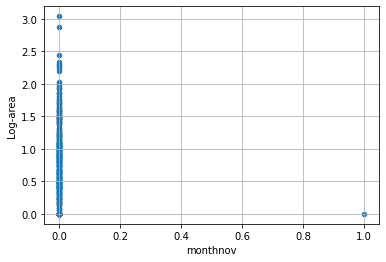

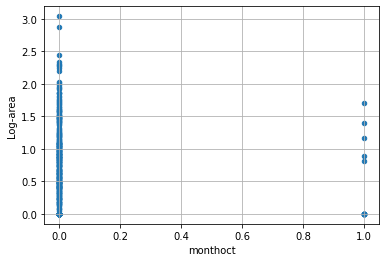

In [8]:
df['Log-area']=np.log10(df['area']+1)
for i in df.describe().columns[:-2]:
    df.plot.scatter(i,'Log-area',grid=True)

<AxesSubplot:title={'center':'Log-area'}, xlabel='day'>

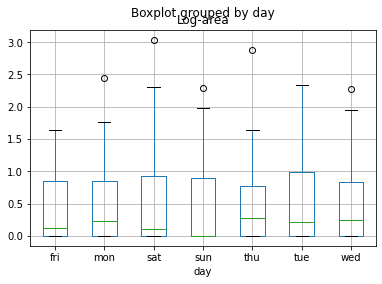

In [9]:
df.boxplot(column='Log-area',by='day')

<AxesSubplot:title={'center':'Log-area'}, xlabel='month'>

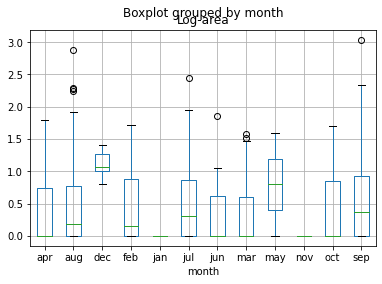

In [10]:
df.boxplot(column='Log-area',by='month')

In [11]:
#LABEL Encoding

In [12]:
enc=LabelEncoder()
enc1=LabelEncoder()
enc.fit(df['month'])
enc1.fit(df['day'])

LabelEncoder()

In [13]:
enc.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [14]:
enc1.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [15]:
df['month_encoded']=enc.transform(df['month'])
df['day_encoded']=enc1.transform(df['day'])

In [16]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,Log-area,month_encoded,day_encoded
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,1,0,0,0,0,small,0.0,7,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,1,0,small,0.0,10,5
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,1,0,small,0.0,10,2
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,small,0.0,7,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,small,0.0,7,3


In [17]:
x=df.drop(['area','Log-area','month','day','size_category'],axis=1)
y=df['Log-area']

In [18]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)
y_train=y_train.values.reshape(y_train.size,1)

In [19]:
#MODEL

In [24]:
model = Sequential()
model.add(Dense(100, input_dim=29))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3000      
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [26]:
learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [27]:
data=x_train
target = y_train
model.fit(data, target, epochs=100, batch_size=10,verbose=0)

In [28]:
a=model.predict(x_test)
print("RMSE for Deep Network:",np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))

RMSE for Deep Network: 0.6150677934629328


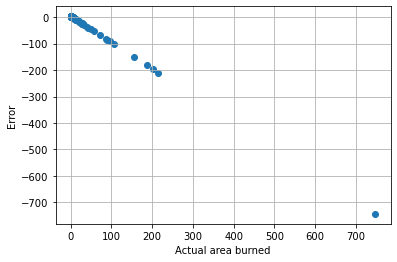

In [29]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,
          2.,   1.,   2.,   4.,  10., 181.]),
 array([-743.266269  , -728.3406689 , -713.41506881, -698.48946871,
        -683.56386862, -668.63826852, -653.71266842, -638.78706833,
        -623.86146823, -608.93586814, -594.01026804, -579.08466795,
        -564.15906785, -549.23346776, -534.30786766, -519.38226757,
        -504.45666747, -489.53106738, -474.60546728, -459.67986719,
        -444.75426709, -429.82866699, -414.9030669 , -399.9774668 ,
        -385.05186671, -370.12626661, -355.20066652, -340.27506642,
        -325.34946633, -310.42386623, -295.49826614, -280.57266604,
        -265.64706595, -250.72146585, -235.79586575, -220.87026566,
        -205.94466556, -191.01906547, -176.093

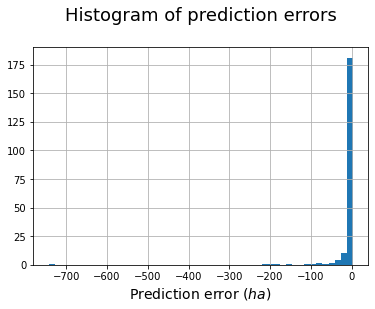

In [30]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)